Менеджер банка беспокоится о том, что все больше и больше клиентов оставляют свои услуги по обслуживанию кредитных карт. Они были бы очень признательны, если бы можно было предсказать для них, кто будет отброшен, чтобы они могли инициативно пойти к клиенту, чтобы предоставить им лучшие услуги и обратить решения клиентов в противоположную сторону.
Источник данных https://leaps.analyttica.com/home

Признаки данных:
churn - ушедший (Attrited) или текущий (Existing) клиент

Customer_Age - Демографическая переменная-возраст клиента в годах
Gender - Демографические переменные - M=мужской, F=женский
Dependent_count - Демографическая переменная-число иждивенцев

Education_Level - Демографическая переменная - образовательная квалификация владельца счета (пример: средняя школа, выпускник колледжа и т. д.)

Marital_Status - Демографическая переменная-женат, холост, разведен, неизвестен

Income_Category - Демографическая переменная - категория годового дохода владельца счета (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, неизвестно)

Card_Category - Переменная продукта-Тип карты (Синяя, серебряная, золотая, Платиновая)

Months_on_book - Период взаимоотношений с банком

Total_Relationship_Count - Общее количество продуктов, находящихся у клиента

Months_Inactive_12_mon - Количество месяцев бездействия за последние 12 месяцев

Contacts_Count_12_mon - Количество контактов за последние 12 месяцев

Credit_Limit - Кредитный лимит по кредитной карте

Total_Revolving_Bal - Общий оборотный остаток на кредитной карте

Avg_Open_To_Buy - Открытая для покупки кредитная линия (в среднем за последние 12 месяцев)

Total_Amt_Chng_Q4_Q1 - Изменение суммы сделки (4 квартал по сравнению с 1 кварталом)

Total_Trans_Amt - Общая сумма сделки (за последние 12 месяцев)

Total_Trans_Ct - Общее количество транзакций (за последние 12 месяцев)

Total_Ct_Chng_Q4_Q1 - Изменение количества транзакций (Q4 по сравнению с Q1)

Avg_Utilization_Ratio - Средний Коэффициент Использования Карт


Ваша задача: предсказать клиентов, которые намереваются уйти (churn). Необходимо продемонстрировать этапы подготовки данных:
Загрузка
Корректность загрузки
Проверка на дубликаты
Проверка на пропуски
Проверка на аномалии
Группировки данных по категориям в зависимости от целевой переменной (выводы о данных, например, отток по типу карты)
Визуализации: гистограммы, тепловые карты, pairplot-ы, violin
Кодирование данных (через one-hot и через уникальное значение)
Разеделение на train и test
Обучение и перебор любых гиперпараметров пройденных алгоритмов на train части
Оценка алгоритма по test части
Следует учесть, что в данных есть дисбаланс по целевой переменной, параметр weights = 'balanced' присутствует почти во всех алгоритмах sklearn. Можно использовать код с занятия, но необходимо оптимизировать под работу с текущими данными, чтоб это не было копированием кода. Вкладка kernels разных наборов данных может помочь Вам с обработкой (например):
https://www.kaggle.com/mlg-ulb/creditcardfraud/notebooks?datasetId=310&sortBy=voteCount

In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

seed = 24

### подгружаем файл

In [73]:
df = pd.read_csv('churn.csv')
df.head()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### Checking tails (for interesting)
#### Проверка хвостов (для интереса)

In [74]:
df.tail()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


### типы данных + объем таблицы

In [75]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

(10127, 20)

### max x min x avg значения

In [76]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### чек на дубликаты

In [77]:
num_duplicates = df.duplicated().sum()
print("Number of duplicated values:", num_duplicates)

Number of duplicated values: 0


### тепловая карта, чек на нули 

<Axes: >

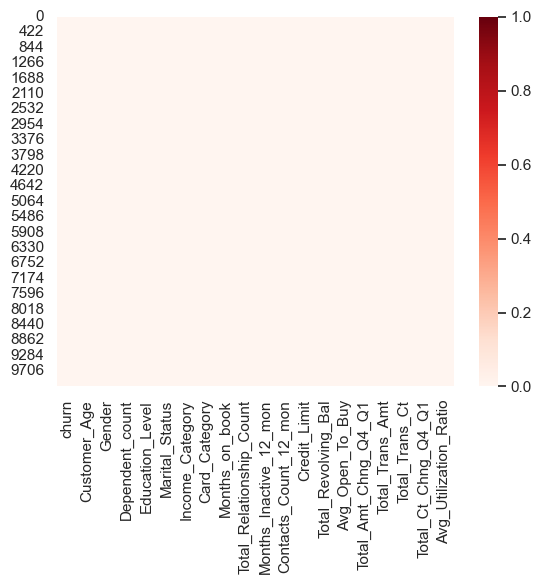

In [78]:
sns.heatmap(df.isnull(), cmap='Reds', vmin=0, vmax=1)

#### выборка для выбросов

In [79]:
df_select_out = df[df.columns[8:]]
outlier_cols = []

for column in df_select_out.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = df_select_out[column].quantile(0.25)
    Q3 = df_select_out[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on the IQR
    outliers = (df_select_out[column] < Q1 - 1.5 * IQR) | (df_select_out[column] > Q3 + 1.5 * IQR)

    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

# Print columns with outliers
print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


#### чек на выбросы

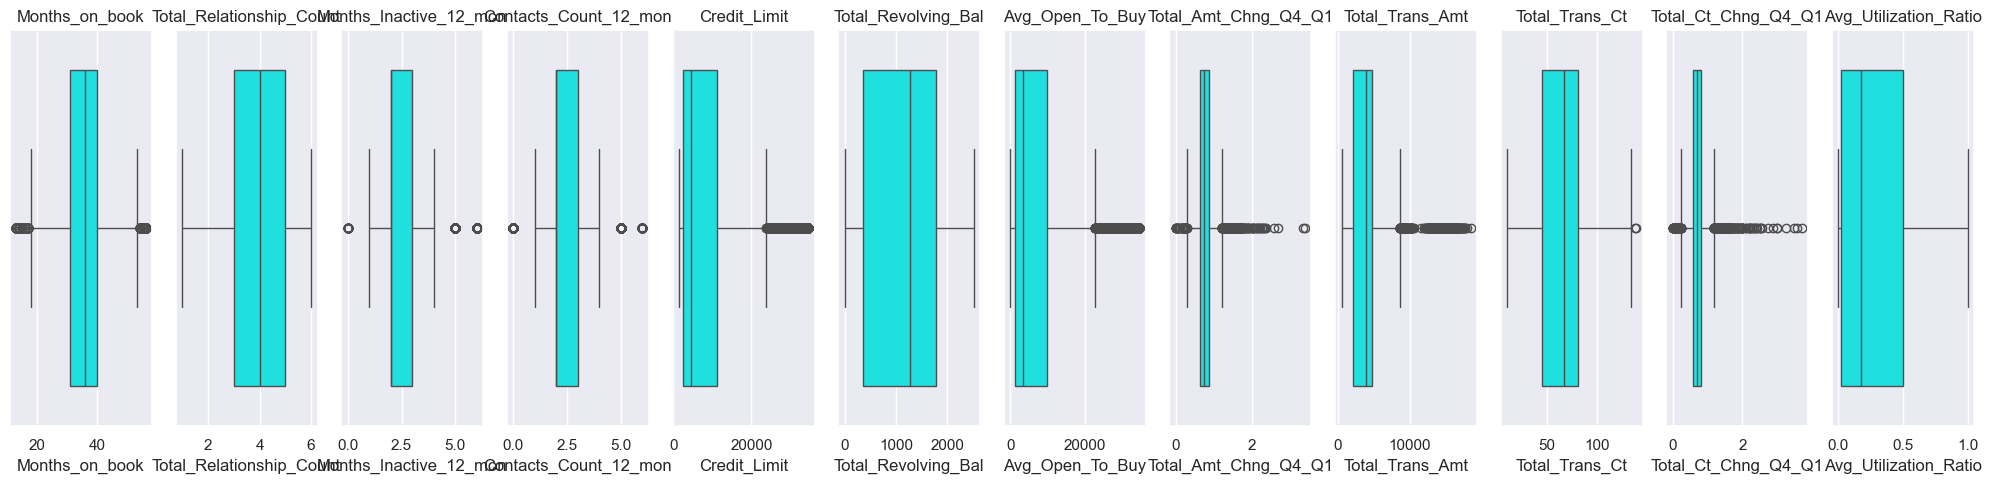

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_select_out.columns), figsize=(20, 5))

for i, column in enumerate(df_select_out.columns):
    sns.boxplot(x=df_select_out[column], ax=axes[i], color='cyan')
    axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

#### удаление выбросов

In [81]:
def del_outliers(frame, column):
    Q1 = frame[column].quantile(0.25)
    Q3 = frame[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return frame[(frame[column] >= lower_bound) & (frame[column] <= upper_bound)]

for col in outlier_cols:
    df = del_outliers(df, col)
df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,Attrited Customer,46,M,3,Graduate,Married,$60K - $80K,Blue,34,1,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,Attrited Customer,48,M,4,College,Married,$80K - $120K,Blue,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10067,Attrited Customer,49,F,4,Uneducated,Married,$40K - $60K,Blue,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
10089,Attrited Customer,52,F,5,Unknown,Married,Less than $40K,Blue,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


#### отпало 1.500 строк

### чек всех значений в выбранных столбцах (объекты)

In [82]:
print("Unique values in churn\n",df['churn'].unique())
df['churn'][df['churn'] == '-']
print("Unique values in Dependent_count\n",df['Dependent_count'].unique())
df['Dependent_count'][df['Dependent_count'] == '-']
print("Unique values in Education_Level\n",df['Education_Level'].unique())
df['churn'][df['Education_Level'] == '-']
print("Unique values in Marital_Status\n",df['Marital_Status'].unique())
df['churn'][df['Education_Level'] == '-']

Unique values in churn
 ['Existing Customer' 'Attrited Customer']
Unique values in Dependent_count
 [5 2 0 4 3 1]
Unique values in Education_Level
 ['Uneducated' 'Graduate' 'Unknown' 'College' 'High School' 'Doctorate'
 'Post-Graduate']
Unique values in Marital_Status
 ['Unknown' 'Married' 'Single' 'Divorced']


Series([], Name: churn, dtype: object)

#### преобразование всех объектов в численные значения

In [83]:
target_column = "churn"
np.random.seed(seed)

continuous_columns = [key for key in df.keys() if df[key].dtype in ("int64", "float64")]
categorical_columns = [key for key in df.keys() if df[key].dtype == "object"]


#categorical_columns.remove(target_column)

print(f"Continuous : {len(continuous_columns)}, Categorical : {len(categorical_columns)}")

Continuous : 14, Categorical : 6


In [84]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Income_Category'] = label_encoder.fit_transform(df['Income_Category'])
df['Card_Category'] = label_encoder.fit_transform(df['Card_Category'])

In [85]:
df.head(5)

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,1,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,0,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,1,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626


### Смотрим процент оставшихся клиентов в банке

In [86]:
churn_count=df['churn'].value_counts()
churn_count

churn
1    5380
0    1083
Name: count, dtype: int64

#### соотношение гендера и статуса клиента в банке (консервной)

In [87]:
average_prices = df.groupby('Gender')['churn'].mean().reset_index()
average_prices

,Gender,churn
0,0,0.821464
1,1,0.850101


### Визуализация графа с соотношением

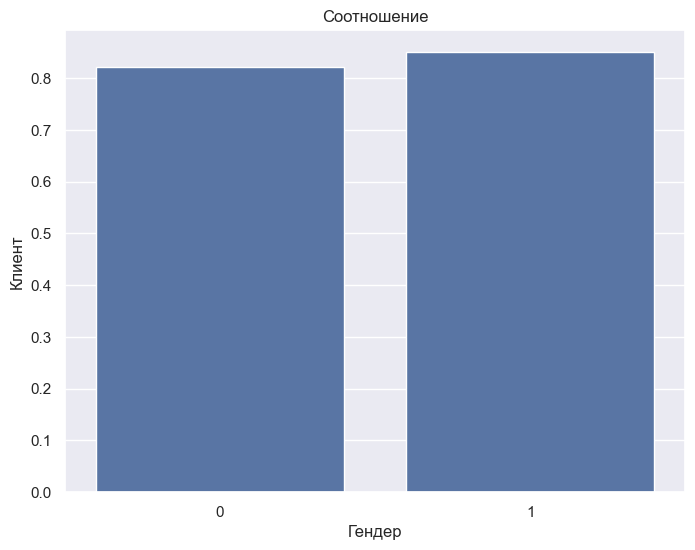

In [88]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='churn', data=average_prices)
plt.title('Соотношение')
plt.xlabel('Гендер')
plt.ylabel('Клиент')

plt.show()

### Визуал ушедших и оставшихся клиентов

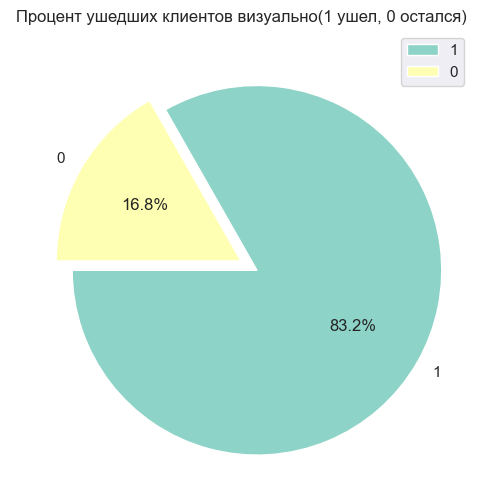

In [89]:
plt.figure(figsize=(6, 6))
explode = (0.1, 0)
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Set3.colors, explode=explode)

plt.legend()
plt.title('Процент ушедших клиентов визуально(1 ушел, 0 остался)')
plt.show()

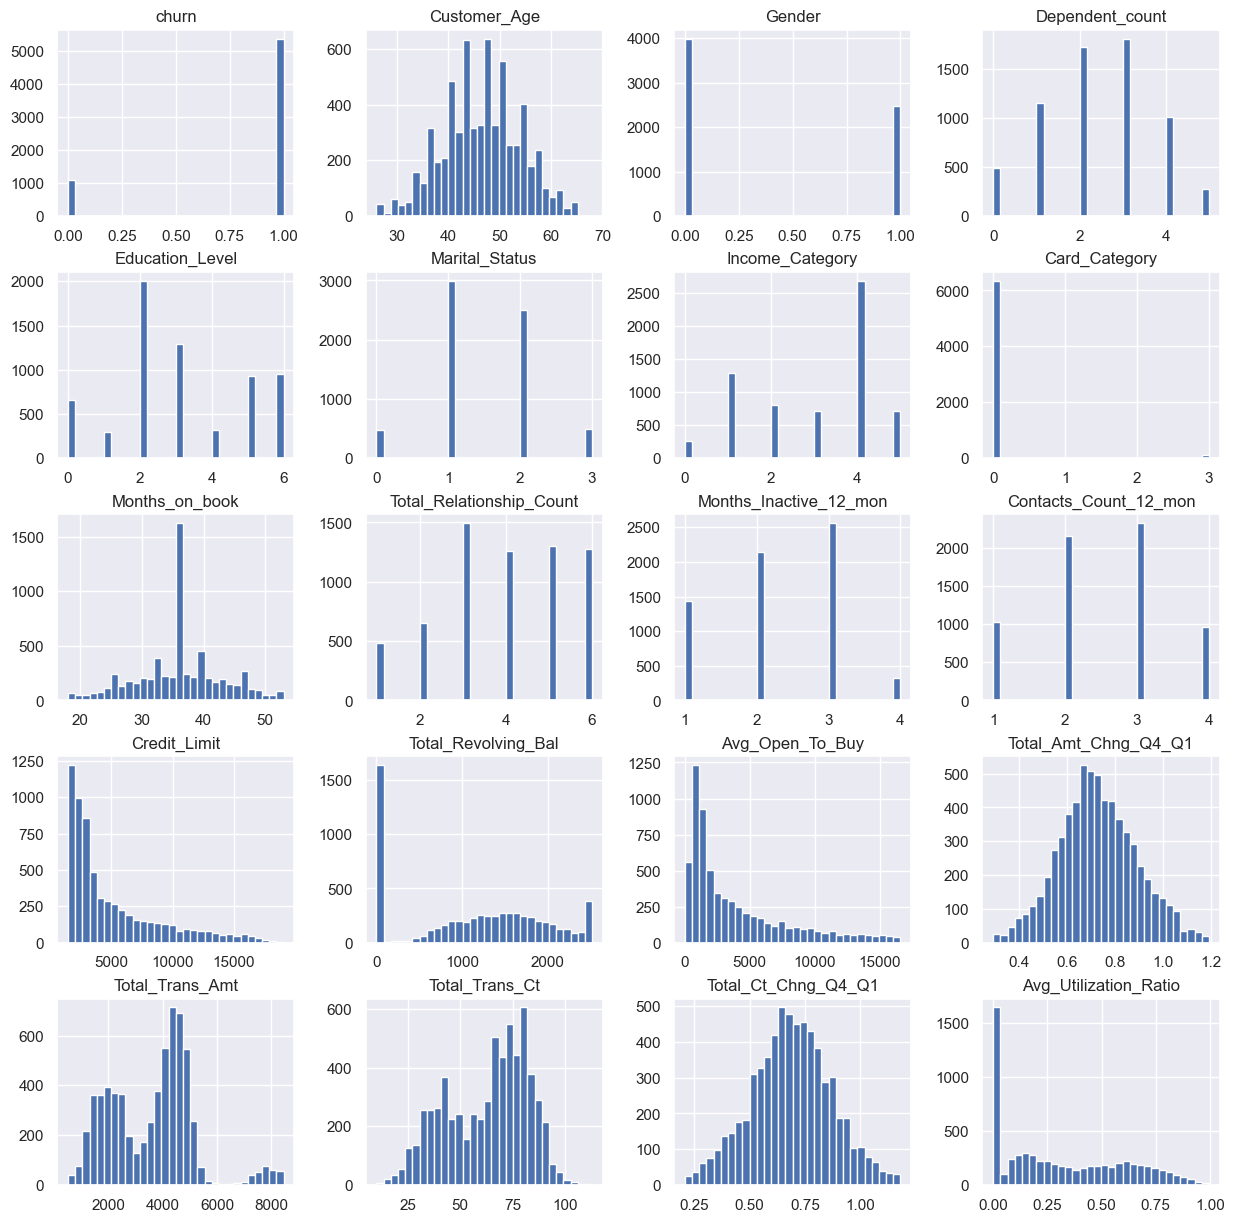

In [90]:
# Гистограммы для числовых переменных 
df.hist(bins=30, figsize=(15, 15)) 
plt.show() 

### Создаем карту корреляции и видим повышенную зависимость ухода от общего кол-ва транзакций.

<Axes: >

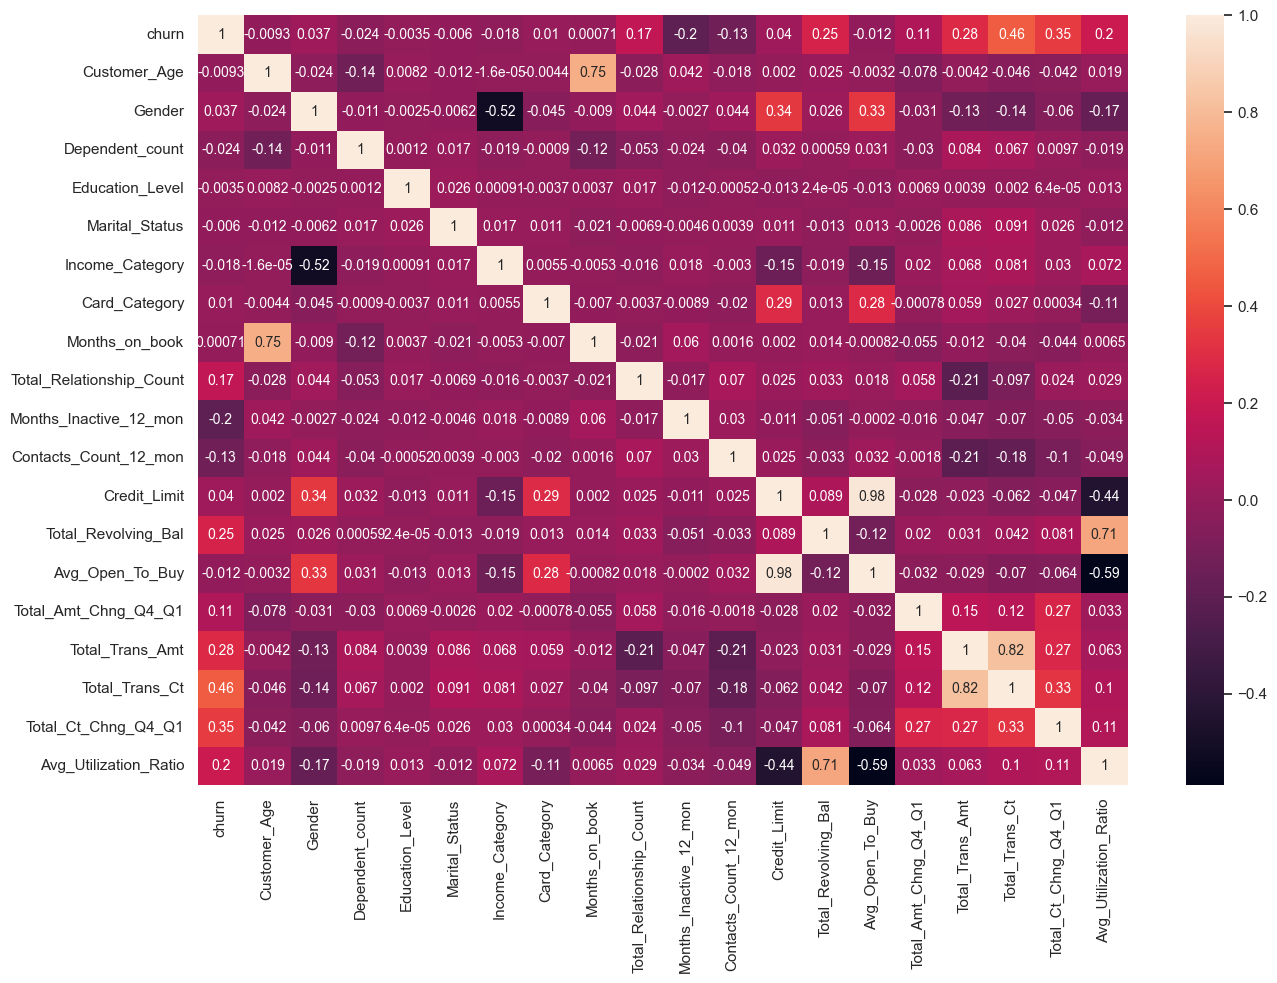

In [91]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize': 10})

In [100]:
df.to_csv("churn.csv")

#### Начнем тест наших данных

Выделяем категории под тест
Далее преобразуем основную переменную из объекта в цифру

In [ ]:
c

In [93]:
from sklearn.model_selection import train_test_split

test_size = 0.2
data_train, data_test, Y_train, Y_test = train_test_split(
    df[df.columns.drop("churn")],
    np.array(df["churn"]),
    test_size=test_size,
    random_state=seed)

print(f"Train : {data_train.shape} {Y_train.shape}")
print(f"Test : {data_test.shape} {Y_test.shape}")

Train : (5170, 19) (5170,)
Test : (1293, 19) (1293,)


Выделим сущности все кроме числовых

### масштабирование данных, чтобы модель работала комфортно и быстро

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_train[continuous_columns] = scaler.fit_transform(data_train[continuous_columns])
data_test[continuous_columns] = scaler.transform(data_test[continuous_columns])

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

In [96]:
model.fit(data_train, Y_train)
Y_pred = model.predict(data_test)

In [ ]:
from sklearn.metrics import classification_report
Y_true = Y_train
print(classification_report(Y_true, Y_pred))

NameError: name 'y_true' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# accuracy = accuracy_score(Y_test, Y_pred)
# recall = recall_score(Y_test, Y_pred)
# precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# print("Точность:", accuracy)
# print("Полнота:", recall)
# print("Точность:", precision)
print("F1-мера:", f1)

F1-мера: 0.9769194536033914


In [98]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier()
model.fit(data_train, Y_train)

Y_pred = model.predict(data_test)

# Оценка точности
accuracy = accuracy_score(Y_test, Y_pred)
print("Точность модели:", accuracy)

Точность модели: 0.9621036349574633
